# Home
<div class="markdown-google-sans">
  <h1>MarketPulse AI</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore MarketPulse AI</h2>

---

  <p>A Notebook application that combines stock price data and recent news analysis for selected companies. It pulls real-time financial data from Alpha Vantage and relevant stock-specific news from StockNewsAPI, then uses an LLM to provide concise summaries and sentiment analysis.
  </p>
</div>


# Step 1: Notebook Setup and Imports







In [ ]:
# Install required libraries if not already installed
!pip install alpha_vantage newsapi-python openai
!pip install python-dotenv


# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dotenv import load_dotenv
import os


# Step 2: Configuration


In [ ]:
from dotenv import load_dotenv
import os

# Load environment variables from the .env file
load_dotenv()

# Retrieve API keys from environment variables
# API Keys - You can also replace these with your own keys
TIINGO_API_KEY = 'placeholder_key'
FINNHUB_API_KEY = 'placeholder_key'
OPENAI_API_KEY = 'placeholder_key'

# Step 3: Data Fetching Functions

<div class="markdown-google-sans">

---

  </n>
  <p>In this step, we’ll create functions to:</p>
  <ol>
    <li>
      Retrieve stock data from Alpha Vantage.
    </li>
    <li>
      Fetch recent news articles from Finnhub related to a specific stock symbol.
    </li>
  </ol>
  

</div>







<strong>Function to Fetch Stock Data</strong>
<p>This function will use Alpha Vantage to get the latest stock data for a given symbol.</p>





In [ ]:
# Function to fetch the past year of stock data from Tiingo
def get_stock_data_tiingo(symbol):
    try:
        end_date = datetime.now().strftime("%Y-%m-%d")
        start_date = (datetime.now() - timedelta(days=30)).strftime("%Y-%m-%d")
        url = f"https://api.tiingo.com/tiingo/daily/{symbol}/prices?startDate={start_date}&endDate={end_date}&token={TIINGO_API_KEY}"

        response = requests.get(url)
        data = response.json()

        if response.status_code == 200 and data:
            # Convert JSON response to DataFrame
            df = pd.DataFrame(data)
            df['date'] = pd.to_datetime(df['date'])
            df.set_index('date', inplace=True)
            return df
        else:
            print(f"Error fetching stock data for {symbol}: {data.get('message', 'Unknown error')}")
            return None
    except Exception as e:
        print(f"Error fetching stock data for {symbol}: {data.get('message', 'Unknown error')}")
        return None

stock_symbol = input("Enter the stock ticker symbol (e.g., AAPL for Apple): ").upper()

# Fetch stock data from Tiingo
stock_data = get_stock_data_tiingo(stock_symbol)

Enter the stock ticker symbol (e.g., AAPL for Apple): hgfmfhk
Error fetching stock data for HGFMFHK: Unknown error


<p>Plotting the chart:</p>

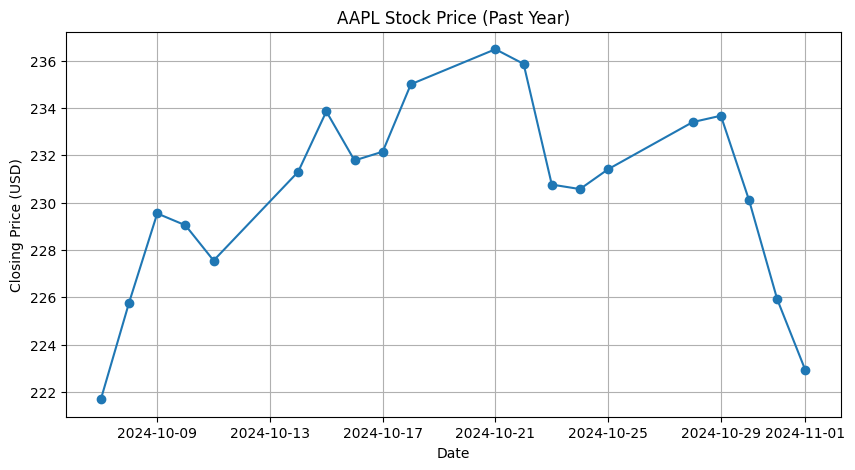

In [ ]:
# Function to plot stock data
def plot_stock_data(df, symbol):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['close'], marker='o', linestyle='-')
    plt.title(f'{symbol} Stock Price (Past Year)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.grid(True)
    plt.show()

if stock_data is not None:
        plot_stock_data(stock_data, stock_symbol)